<a href="https://colab.research.google.com/github/t-zakharenko/ML-course-May-2025/blob/main/HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E_TZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# ініціація датафреймів
medical_df = pd.read_csv('drive/MyDrive/ML_course_2025/medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']

---
## Завдання 1. Знаходження найкращої ліній для прогнозу `charges` за `age` для некурців (датафрейм `non_smoker_df``)

---
### Використання методу МНК
 (з використанням тільки `numpy`, без `scikit learn`)

In [13]:
# Вхідні дані для МНК
x = non_smoker_df['age'].values          # одновимірний масив віку
y = non_smoker_df['charges'].values      # одновимірний масив цільових значень

In [14]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [15]:
# Додаємо колонку одиниць для зсуву (bias term). На виході отримаємо матрицю розміром
# (n, 2), де перша колонка - одинички, друга - вік (age)
X_with_intercept = np.c_[np.ones((x.shape[0], 1)), x]
# x[:3], X_with_intercept[:3]             # для візуального контролю

In [16]:
# розраховуємо коефіцієнти моделі
MNK_coefs = normal_equations(X_with_intercept, y)

# розраховуємо прогнозні значення
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

# розраховуємо точність прогнозу RMSE
RMSE = np.sqrt(np.mean((y - predictions_MNK) ** 2))

In [17]:
print('=' * 50)
print(' МЕТОД НАЙМЕНШИХ КВАДРАТІВ (МНК) '.center(50, ' '))
print(' РЕЗУЛЬТАТИ МОДЕЛІ '.center(50, ' '))


print(f"Вільний член b (перетин): {MNK_coefs[0]:.2f}")
print(f"Коефіцієнт w (нахил): {MNK_coefs[1]:.2f}")
print(f"RMSE: {RMSE:.2f}")

print("Прогнозні значення:")
print(predictions_MNK)
print('=' * 50)


         МЕТОД НАЙМЕНШИХ КВАДРАТІВ (МНК)          
                РЕЗУЛЬТАТИ МОДЕЛІ                 
Вільний член b (перетин): -2091.42
Коефіцієнт w (нахил): 267.25
RMSE: 4662.51
Прогнозні значення:
[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]


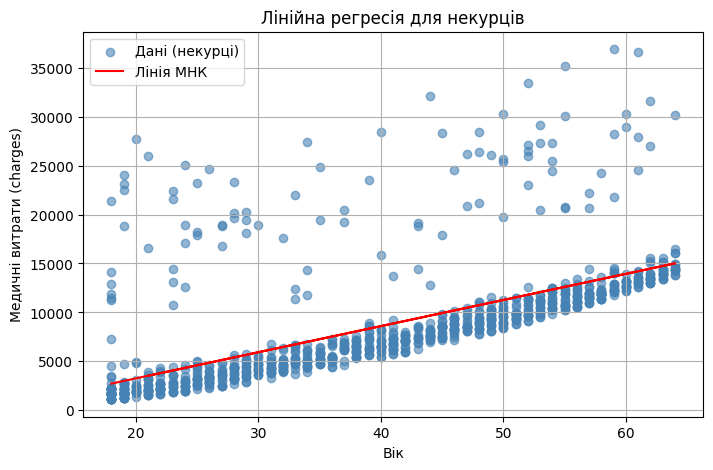

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.6, color='SteelBlue', label='Дані (некурці)')
plt.plot(x, predictions_MNK, color='red', label='Лінія МНК')
plt.xlabel('Вік')
plt.ylabel('Медичні витрати (charges)')
plt.title('Лінійна регресія для некурців')
plt.legend()
plt.grid(True)
plt.show()


---
### Використання Full-Batch градієнтного спуску з `numpy`

In [23]:
y_hat = MNK_coefs[0] + x*MNK_coefs[1]

In [25]:
# Градієнтний спуск
def full_batch_gradient_descent(X, Y, lr=0.001, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(Y)
    errors = []

    for i in range(epochs):
        y_pred = m * X[:, 0] + b  # Прогноз
        error = y_pred - Y        # Помилка

        # Функція втрат (середня квадратична помилка)
        loss = np.mean(error ** 2)
        errors.append(loss)

        # Градієнти
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)

        # Оновлення параметрів
        m = m - lr * m_gradient
        b = b - lr * b_gradient

    return m, b, errors

In [26]:
x_reshaped = x.reshape(-1, 1)

        МЕТОД FULL-BATCH GRADIENT DESCENT         
    РЕЗУЛЬТАТИ МОДЕЛІ (learning rate = 0.001)     
Вільний член b (перетин): -31448925830775484460463694822921312665600.00
Коефіцієнт w (нахил): -1396762426208284189192631894478196395999232.00
RMSE: 58449709239434060761576321400103028823949312.00
Прогнозні значення:
[-2.51731726e+43 -3.91407969e+43 -4.61246090e+43 ... -2.51731726e+43
 -2.51731726e+43 -2.93634599e+43]


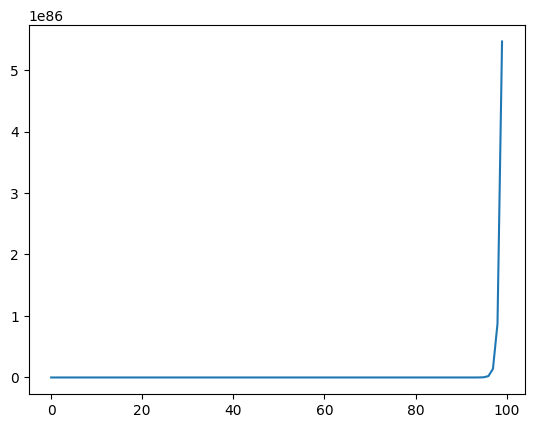

In [28]:
m, b, errors = full_batch_gradient_descent(x_reshaped, y, lr=0.001, epochs=100)
predictions_fbgd_001 = m * x_reshaped[:, 0] + b

# розраховуємо точність прогнозу RMSE
RMSE_fbgd_001 = np.sqrt(np.mean((y - predictions_fbgd_001) ** 2))

print('=' * 50)
print(' МЕТОД FULL-BATCH GRADIENT DESCENT '.center(50, ' '))
print(' РЕЗУЛЬТАТИ МОДЕЛІ (learning rate = 0.001) '.center(50, ' '))

print(f"Вільний член b (перетин): {b:.2f}")
print(f"Коефіцієнт w (нахил): {m:.2f}")
print(f"RMSE: {RMSE_fbgd_001:.2f}")

print("Прогнозні значення:")
print(predictions_fbgd_001)
print('=' * 50)

plt.plot(errors)

        МЕТОД FULL-BATCH GRADIENT DESCENT         
    РЕЗУЛЬТАТИ МОДЕЛІ (learning rate = 0.0001)    
Вільний член b (перетин): -41.98
Коефіцієнт w (нахил): 221.10
RMSE: 4713.25
Прогнозні значення:
[3937.9012503  6148.94709409 7254.47001599 ... 3937.9012503  3937.9012503
 4601.21500344]


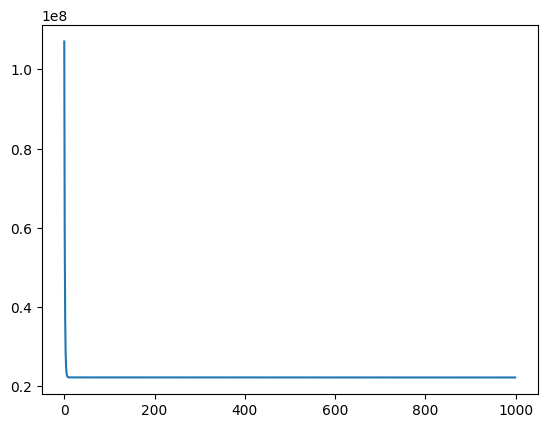

In [29]:
m, b, errors = full_batch_gradient_descent(x_reshaped, y, lr=0.0001, epochs=1000)
predictions_fbgd_0001 = m * x_reshaped[:, 0] + b

# розраховуємо точність прогнозу RMSE
RMSE_fbgd_0001 = np.sqrt(np.mean((y - predictions_fbgd_0001) ** 2))

print('=' * 50)
print(' МЕТОД FULL-BATCH GRADIENT DESCENT '.center(50, ' '))
print(' РЕЗУЛЬТАТИ МОДЕЛІ (learning rate = 0.0001) '.center(50, ' '))

print(f"Вільний член b (перетин): {b:.2f}")
print(f"Коефіцієнт w (нахил): {m:.2f}")
print(f"RMSE: {RMSE_fbgd_0001:.2f}")

print("Прогнозні значення:")
print(predictions_fbgd_0001)
print('=' * 50)

plt.plot(errors);

        МЕТОД FULL-BATCH GRADIENT DESCENT         
   РЕЗУЛЬТАТИ МОДЕЛІ (learning rate = 0.00001)    
Вільний член b (перетин): 0.21
Коефіцієнт w (нахил): 220.15
RMSE: 4715.35
Прогнозні значення:
[3962.99500573 6164.54056084 7265.3133384  ... 3962.99500573 3962.99500573
 4623.45867227]


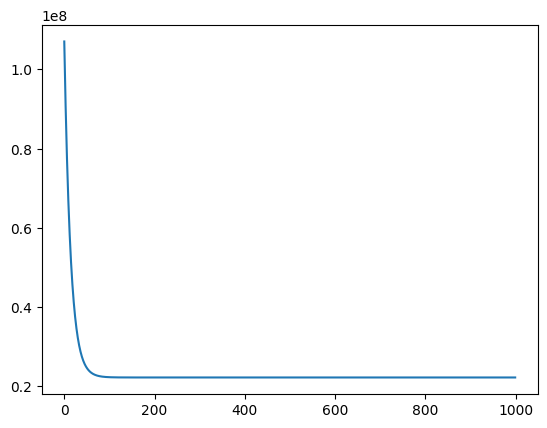

In [30]:
m, b, errors = full_batch_gradient_descent(x_reshaped, y, lr=0.00001, epochs=1000)
predictions_fbgd_00001 = m * x_reshaped[:, 0] + b

# розраховуємо точність прогнозу RMSE
RMSE_fbgd_00001 = np.sqrt(np.mean((y - predictions_fbgd_00001) ** 2))


print('=' * 50)
print(' МЕТОД FULL-BATCH GRADIENT DESCENT '.center(50, ' '))
print(' РЕЗУЛЬТАТИ МОДЕЛІ (learning rate = 0.00001) '.center(50, ' '))

print(f"Вільний член b (перетин): {b:.2f}")
print(f"Коефіцієнт w (нахил): {m:.2f}")
print(f"RMSE: {RMSE_fbgd_00001:.2f}")

print("Прогнозні значення:")
print(predictions_fbgd_00001)
print('=' * 50)

plt.plot(errors);

**Висновок:**
*  Learning Rate 0.01 - модель "вибухає", параметри m і b йдуть в безкінечність
*  Learning Rate 0.0001 дає найкращий результат. Графік втрат швидко спадає, стабільний.
*  Learning Rate 0.00001 занадто повільний.

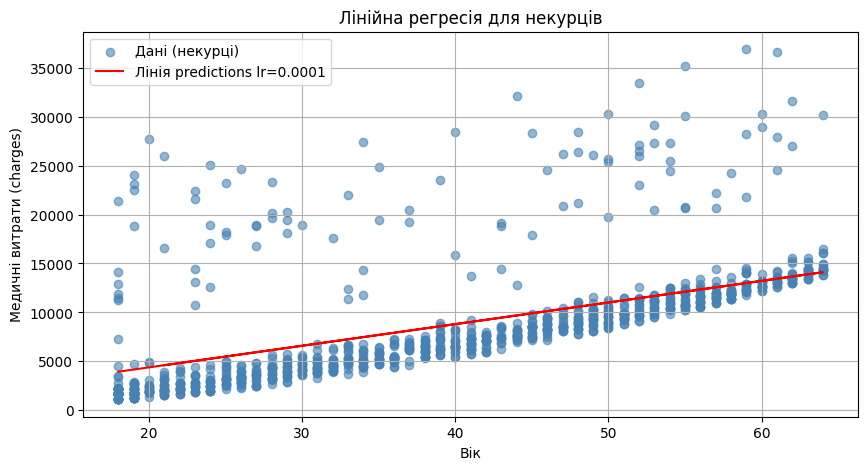

In [85]:
# Діаграма розсіювання для варіанту lr=0.0001
plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.6, color='SteelBlue', label='Дані (некурці)')
plt.plot(x, predictions_fbgd_0001, color='red', label='Лінія predictions lr=0.0001')
plt.xlabel('Вік')
plt.ylabel('Медичні витрати (charges)')
plt.title('Лінійна регресія для некурців')
plt.legend()
plt.grid(True)
plt.show()

---
### Використання `scikit-learn.LinearRegression`


In [31]:
!pip install scikit-learn --quiet

In [32]:
from sklearn.linear_model import LinearRegression

# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()

In [33]:
lin_reg

LinearRegression()

In [34]:
lin_reg.fit(x_reshaped, y)

LinearRegression()

In [35]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), np.float64(-2091.4205565650864))

In [36]:
predictions_sklearn = lin_reg.predict(x_reshaped)

# розраховуємо точність прогнозу RMSE
RMSE_sklearn = np.sqrt(np.mean((y - predictions_sklearn) ** 2))


In [37]:
predictions_sklearn

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [47]:
lin_reg.coef_[0]

np.float64(267.2489128311997)

In [48]:
print('=' * 50)
print(' МЕТОД sklearn '.center(50, ' '))
print(' РЕЗУЛЬТАТИ МОДЕЛІ '.center(50, ' '))

print(f"Вільний член b (перетин): {lin_reg.intercept_:.2f}")
print(f"Коефіцієнт w (нахил): {lin_reg.coef_[0]:.2f}")
print(f"RMSE: {RMSE_sklearn:.2f}")

print("Прогнозні значення:")
print(predictions_sklearn)
print('=' * 50)

                  МЕТОД sklearn                   
                РЕЗУЛЬТАТИ МОДЕЛІ                 
Вільний член b (перетин): -2091.42
Коефіцієнт w (нахил): 267.25
RMSE: 4662.51
Прогнозні значення:
[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]


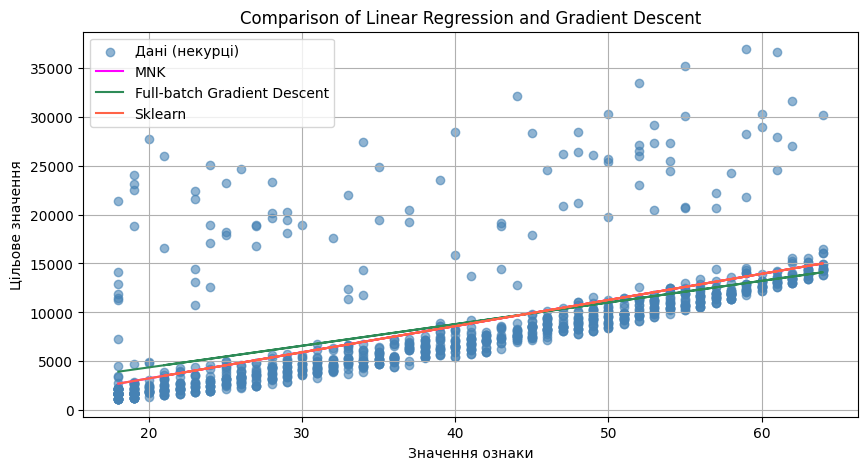

In [297]:
# Побудова прогнозу
plt.figure(figsize=(10, 5))

plt.scatter(x, y, alpha=0.6, color='SteelBlue', label='Дані (некурці)')
plt.plot(X[:, 0], predictions_MNK, color='Magenta', label='MNK')
plt.plot(X[:, 0], predictions_fbgd_0001, color='SeaGreen', label='Full-batch Gradient Descent')
plt.plot(X[:, 0], predictions_sklearn, color='Tomato', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()


# **Загальний висновок**

### Власне припущення
- Вільний член b (перетин): **-2600**
- Коефіцієнт w (нахил): **280**
- RMSE:**4665.96**

==================================================
### МНК
- Вільний член b (перетин): **-2091.42**
- Коефіцієнт w (нахил): **267.25**
- RMSE:**4662.51**

==================================================
### МЕТОД FULL-BATCH GRADIENT DESCENT
- Вільний член b (перетин): **-41.98**
- Коефіцієнт w (нахил): **221.10**
- RMSE:**4713.25**

==================================================
### sklearn
- Вільний член b (перетин): **-2091.42**
- Коефіцієнт w (нахил): **267.25**
- RMSE:**4662.51*

==================================================

Ідеально збігаються результати моделей МНК та sklear. Власні припущення (з минулої домашньої роботи) також доволі близьки до цих розрахунків. Метод FULL-BATCH GRADIENT DESCENT відрізняється, особливо сильно - у перетині. Також похибка (RMSE) найбільша. Можливо, це результат помилки в побудові моделі (коді), не знаю.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [69]:
# ініціація датафрейм
smoker_df = medical_df[medical_df.smoker == 'yes']

In [70]:
# Вхідні дані для МНК
x_sm = smoker_df['age'].values          # одновимірний масив віку
y_sm = smoker_df['charges'].values      # одновимірний масив цільових значень

In [73]:
x_sm_reshaped = x_sm.reshape(-1, 1)

In [74]:
lin_reg.fit(x_sm_reshaped, y_sm)

LinearRegression()

In [75]:
lin_reg.coef_, lin_reg.intercept_

(array([305.23760211]), np.float64(20294.128126915966))

In [76]:
predictions_sklearn_sm = lin_reg.predict(x_sm_reshaped)

# розраховуємо точність прогнозу RMSE
RMSE_sklearn_sm = np.sqrt(np.mean((y_sm - predictions_sklearn_sm) ** 2))


In [80]:
lin_reg.coef_[0]

np.float64(305.2376021098288)

In [81]:
print('=' * 50)
print(' МЕТОД sklearn '.center(50, ' '))
print(' РЕЗУЛЬТАТИ МОДЕЛІ '.center(50, ' '))

print(f"Вільний член b (перетин): {lin_reg.intercept_:.2f}")
print(f"Коефіцієнт w (нахил): {lin_reg.coef_[0]:.2f}")
print(f"RMSE: {RMSE_sklearn:.2f}")

print("Прогнозні значення:")
print(predictions_sklearn)
print('=' * 50)

                  МЕТОД sklearn                   
                РЕЗУЛЬТАТИ МОДЕЛІ                 
Вільний член b (перетин): 20294.13
Коефіцієнт w (нахил): 305.24
RMSE: 4662.51
Прогнозні значення:
[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]


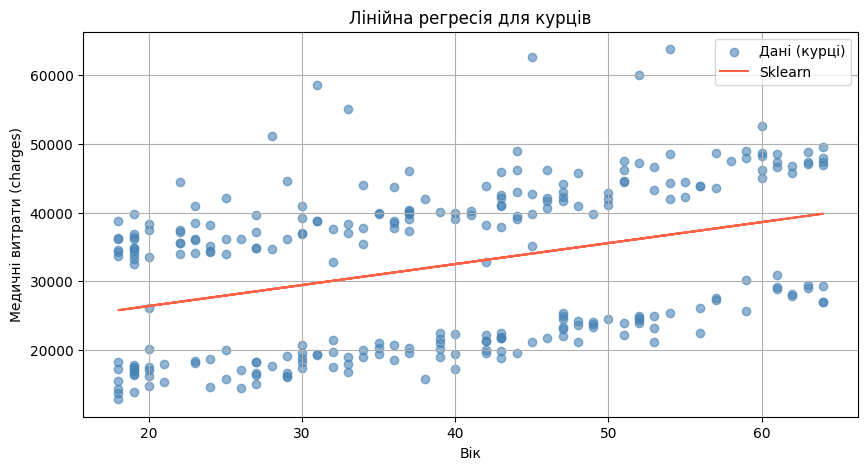

In [84]:
# Побудова прогнозу
plt.figure(figsize=(10, 5))

plt.scatter(x_sm, y_sm, alpha=0.6, color='SteelBlue', label='Дані (курці)')
plt.plot(x_sm, predictions_sklearn_sm, color='Tomato', label='Sklearn')
plt.title('Лінійна регресія для курців')
plt.xlabel('Вік')
plt.ylabel('Медичні витрати (charges)')
plt.legend()
plt.grid(True)
plt.show()

**Висновок:**
Здається, модель потребує уточнення. Я б спробувала пошукати признак, якій дозволив би розділити дані по всіх курцях на два датафрейми, щоб будувати прогноз витрат більш точно.